In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import h5py

#import os
#import math

In [21]:
def getdata(filename, staname, cmpid):
    if cmpid < 0 or cmpid > 2:
        print('Error with cmpid =', cmpid, 'can only be 0-2')
        return 0,0
    
    fid = h5py.File(filename, 'r')
    grp = fid[staname]
    npts = grp['NPTS'][0]
    nsew = grp['ISNSEW'][0]
    if nsew == 1:
        data_names = ['EW', 'NS', 'UP']
        has_nsew = 1
    else:
        data_names = ['X', 'Y', 'Z']
        
    data=np.array(grp[data_names[cmpid]][0:npts])
    
    return data,npts

def querystaname(filename, lat, lon, depth):
    t = 1e-5
    fid = h5py.File(filename, 'r')
    for grp in fid.keys():
        if isinstance(fid[grp], h5py.Group):
            stlalodp = fid[grp]['STLA,STLO,STDP']
            if abs(stlalodp[0]-lat)<t and abs(stlalodp[1]-lon)<t and abs(stlalodp[2]-depth)<t:
                return grp
                print (grp)
    return None

def gettimeseries(filename, staname):
    fid = h5py.File(filename, 'r')
    grp = fid[staname]
    npts = grp['NPTS'][0]
    delta = fid['DELTA'][0]
    if npts <= 0 or delta <=0:
        print('Error with station data, npts = ', npts, ', delta = ', delta)
    origintime = fid['ORIGINTIME'][0]
    datatime= np.linspace(0, delta*(npts-1), npts)
    print(delta, npts, origintime, datatime[0], datatime[10])
    
    return datatime

def getxyz(filename, staname):
    fid = h5py.File(filename, 'r')
    grp = fid[staname]
    stxyz = grp['STX,STY,STZ']
    return stxyz[0], stxyz[1], stxyz[2]


def getlatlondp(filename, staname):
    fid = h5py.File(filename, 'r')
    grp = fid[staname]
    stlalodp = grp['STLA,STLO,STDP']
    return stlalodp[0], stlalodp[1], stlalodp[2]

def getloc(filename, staname):
    fid = h5py.File(filename, 'r')
    grp = fid[staname]
    loc = grp['LOC'][0]
    return loc

def getstarttime(filename):
    fid = h5py.File(filename, 'r')
    timestr = str(fid.attrs['DATETIME'], 'utf-8')
    starttime = datetime.datetime.strptime(timestr, '%Y-%m-%dT%H:%M:%S.%f')
    return starttime

def getdt(filename):
    fid = h5py.File(filename, 'r')
    delta = fid['DELTA'][0]
    return delta

def getunit(filename):
    fid = h5py.File(filename, 'r')
    unit = str(fid.attrs['UNIT'], 'utf-8')
    return unit

def getcmpazinc(filename, staname, cmpid):
    if cmpid < 0 or cmpid > 2:
        print('Error with cmpid =', cmpid, 'can only be 0-2')
        return -1, -1
    fid = h5py.File(filename, 'r')
    grp = fid[staname]
    nsew = grp['ISNSEW'][0]
    if nsew == 1:
        data_names = ['EW', 'NS', 'UP']
        has_nsew = 1
    else:
        data_names = ['X', 'Y', 'Z']

    azname = data_names[cmpid] + 'CMPAZ'
    incname = data_names[cmpid] + 'CMPINC'
    cmpaz = grp[azname][0]
    cmpinc = grp[incname][0]

    return cmpaz, cmpinc

0.026246719 1525 5.0 0.0 0.2624671906232834
Station BK.MCCM
  x = 6211.0737 y = 67647.66 z = 4.0
  lat = 38.14478 lon = -122.88018 depth = 4.0
  loc = 0
  start time = 2018-01-04 10:39:32.000694
  delta = 0.026246719
  unit = m
  cmpaz = 0.0 cmpinc = 0.0
  number of timesteps = 1525


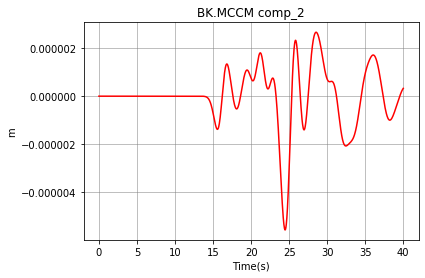

Station name of queried condition with (lat = 38.14478 lon = -122.88018 depth = 4.0 ) is BK.MCCM


In [34]:
hdf5filename = '/global/u1/h/houhun/sw4/sachdf5/inverse/berkeley-jan-4-2018_hdf5_output/berkeley.h5_out'
staname = 'BK.MCCM'
comp = 2

timeseries      = gettimeseries(hdf5filename, staname)
x, y, z         = getxyz(hdf5filename, staname)
lat, lon, depth = getlatlondp(hdf5filename, staname)
loc             = getloc(hdf5filename, staname)
starttime       = getstarttime(hdf5filename)
data, npts      = getdata(hdf5filename, staname, comp)
delta           = getdt(hdf5filename)
unit            = getunit(hdf5filename)
cmpaz, cmpinc   = getcmpazinc(hdf5filename, staname, comp)

print('Station', staname)
print('  x =', x, 'y =', y, 'z =', z)
print('  lat =', lat, 'lon =', lon, 'depth =', depth)
print('  loc =', loc)
print('  start time =', starttime)
print('  delta =', delta)
print('  unit =', unit)
print('  cmpaz =', cmpaz, 'cmpinc =', cmpinc)
print('  number of timesteps =', npts)

plt.title(staname+' comp_'+str(comp))
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel(unit)
plt.xlabel('Time(s)')
plt.plot(timeseries, data, '-', color='red');
plt.show()


name = querystaname(hdf5filename, lat, lon, depth)
print('Station name of queried condition with (lat =', lat, 'lon =', lon, 'depth =', depth, ') is', name)

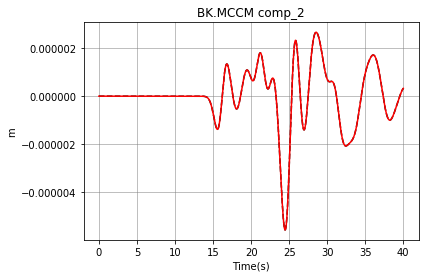

In [36]:
def readusgs(filename, cmpid):
    sta = open(filename, 'r')
    linestoken=sta.readlines()
    x=[]
    times=[]
    for line in linestoken:
        if line[0] == '#':
            continue
        x.append(np.float32(line.split()[cmpid+1]))
        times.append(np.float32(line.split()[0]))


    return times, x

usgsfile = '/global/u1/h/houhun/sw4/sachdf5/inverse/berkeley-jan-4-2018_output/BK.BH.MCCM_out.txt'
usgstimes, usgs1 = readusgs(usgsfile, comp)

plt.title(staname +' comp_'+str(comp))
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel(unit)
plt.xlabel('Time(s)')
plt.plot(usgstimes, usgs1, '-', color='red');
plt.plot(timeseries, data, '--', color='black');

plt.show()